### 13.1 Artificial Neural Network, Deep Learning, and Multilayer Perceptron

- The goal in deep learning is to use ANNs of multiple layers that can extract underlying patterns of data at increasingly more layers of abstraction. As a result, deep neural networks do not generally require a separate feature extraction stage.

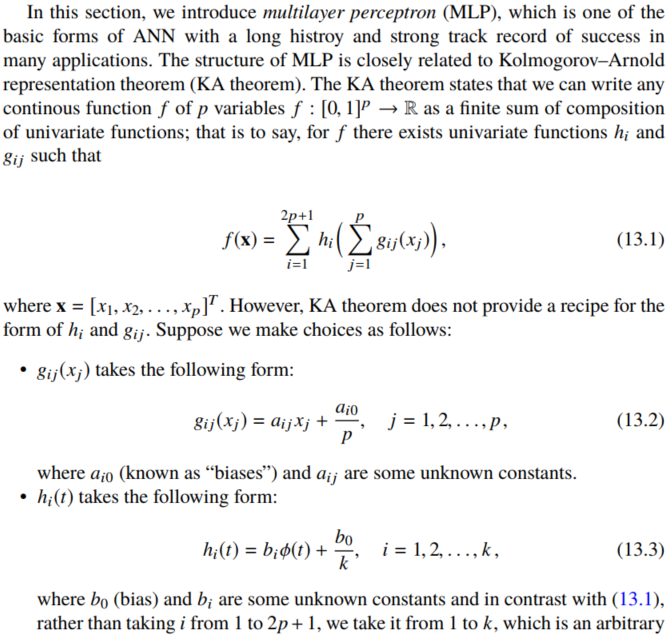

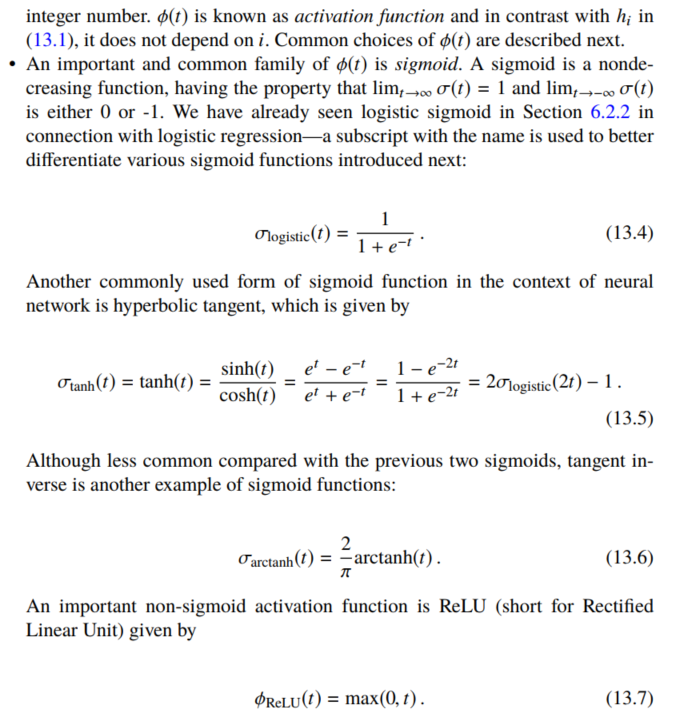

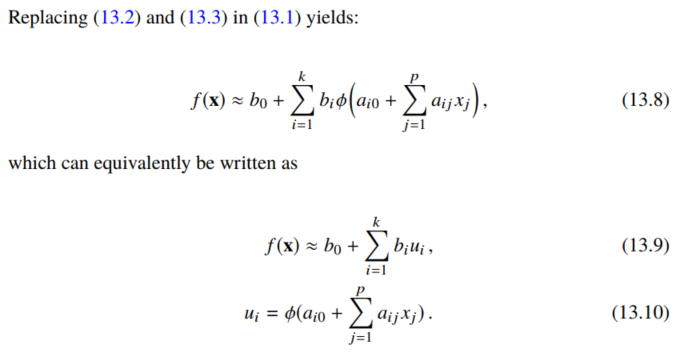

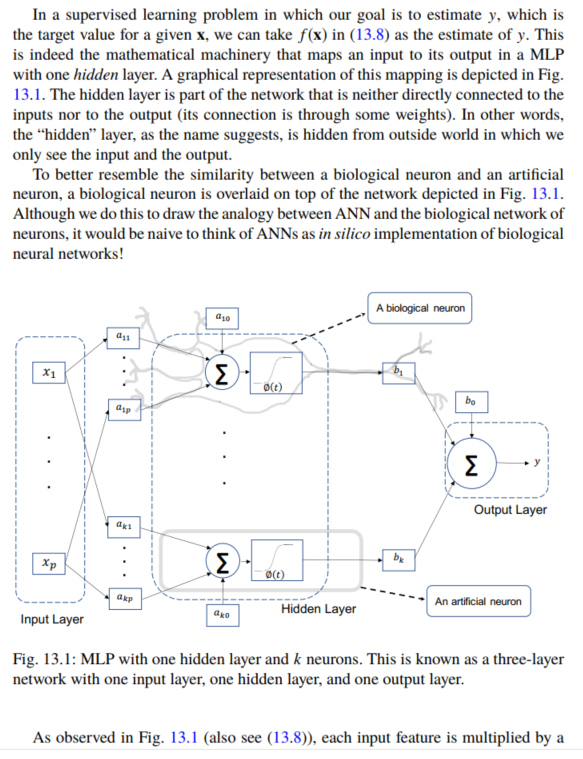

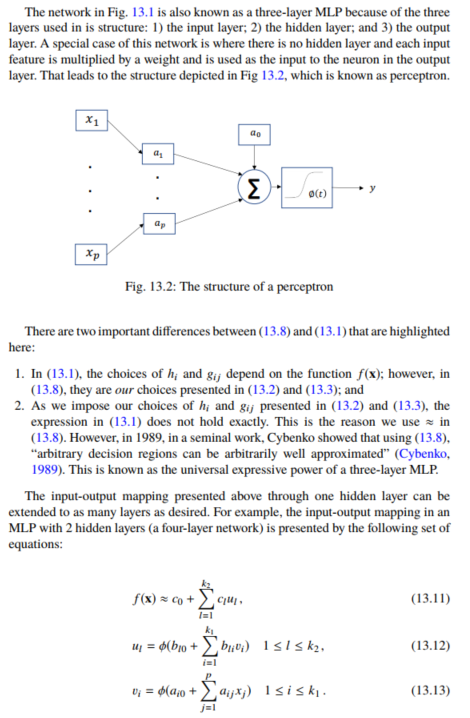

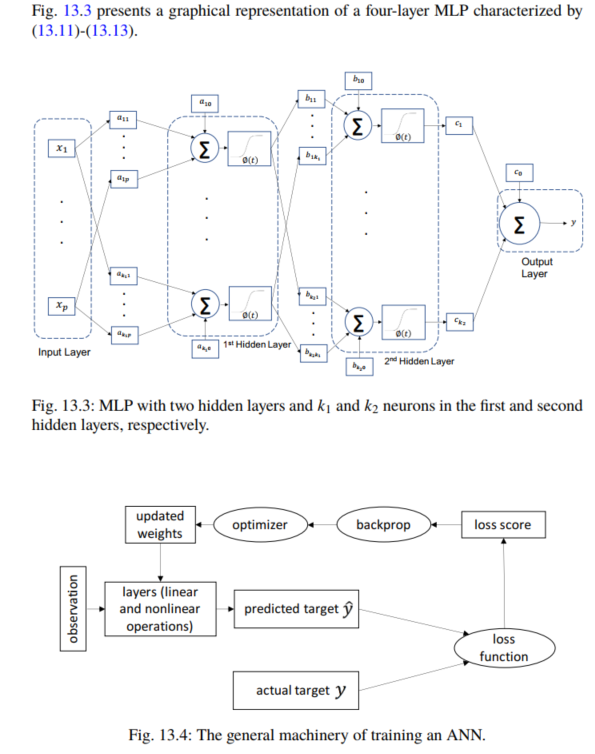

### 13.2 Backpropagation, Optimizer, Batch Size, and Epoch

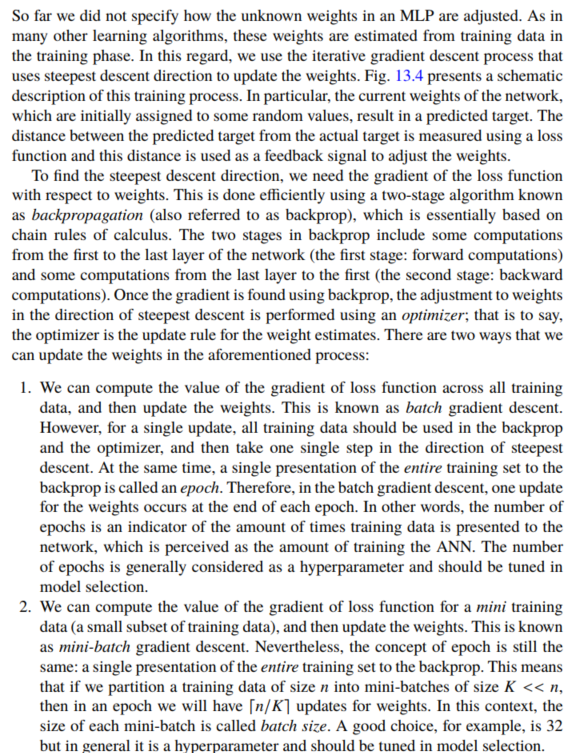

### 13.3 Why Keras?

1. scikit-learn does not support using GPU or TPU
2. scikit-learn does not currently implement some popular forms of neural networks such as CNN or RNN

In [32]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.17.0
3.5.0


### 13.4 Google Colaboratory (Colab)

In [33]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### 13.5 The First Application Using Keras

#### 13.5.1 Classification of Handwritten Digits: MNIST Dataset

In [34]:
from tensorflow.keras.datasets import mnist

seed_value= 42
# set the seed for Python built-in pseudo-random generator
import random
random.seed(seed_value)
# set the seed for numpy pseudo-random generator
import numpy as np
np.random.seed(seed_value)
# set the seed for tensorflow pseudo-random generator
import tensorflow as tf
tf.random.set_seed(seed_value)

(X_train_val, y_train_val), (X_test, y_test) = mnist.load_data()
print(type(X_train_val))
print(X_train_val.dtype)
print(X_train_val.shape)
print(X_train_val.ndim)

<class 'numpy.ndarray'>
uint8
(60000, 28, 28)
3


Rescaling to $[0,1]$, since uint8 is from 0 to 255

In [35]:
X_train_val, X_test = X_train_val.astype('float32')/255, X_test.astype('float32')/255
print(X_train_val.dtype)

float32


MLP expects input of (sample size, feature size)

In [36]:
X_train_val, X_test = X_train_val.reshape(60000, 28*28), X_test.reshape(10000, 28*28)
X_train_val[0].shape

(784,)

For model selection, split to training and validation set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=0.25)
X_train.shape

(45000, 784)

#### 13.5.2 Building Model Structure in Keras

3 ways to build object of `tf.keras.Model` class:
1. Sequential API
2. Functional API
3. Subclassing API

Method 1: pass a list of layers to `keras.Sequential` class constructor to instantiate.

In [38]:
from tensorflow import keras
from tensorflow.keras import layers

mnist_model = keras.Sequential([
  layers.Dense(128, activation="sigmoid", input_shape=X_train[0].shape),
  layers.Dense(64, activation="sigmoid"),
  layers.Dense(10, activation="softmax")
  ])

c:\Users\User\anaconda3\envs\mle\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
mnist_model.weights

[<KerasVariable shape=(784, 128), dtype=float32, path=sequential_6/dense_14/kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=sequential_6/dense_14/bias>,
 <KerasVariable shape=(128, 64), dtype=float32, path=sequential_6/dense_15/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_6/dense_15/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_6/dense_16/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_6/dense_16/bias>]

In [40]:
mnist_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Method 2: instantiate `keras.Sequential` first with no layer and then use `add()` method to add layers one after another.

In [41]:
from tensorflow import keras
from tensorflow.keras import layers

mnist_model = keras.Sequential()
mnist_model.add(layers.Dense(128, activation="sigmoid", input_shape=X_train[0].shape))
mnist_model.add(layers.Dense(64, activation="sigmoid"))
mnist_model.add(layers.Dense(10, activation="softmax"))

Softmax:

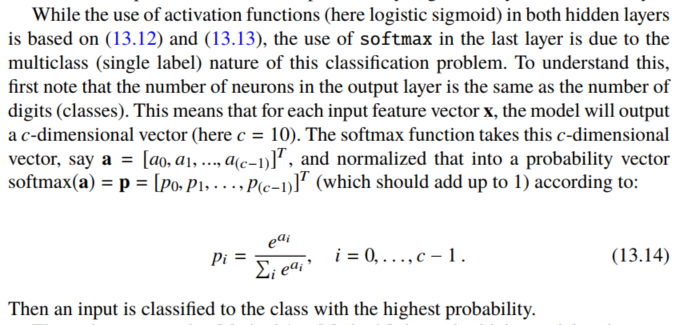

#### 13.5.3 Compiling: `optimizer`, `metrics` and `loss`

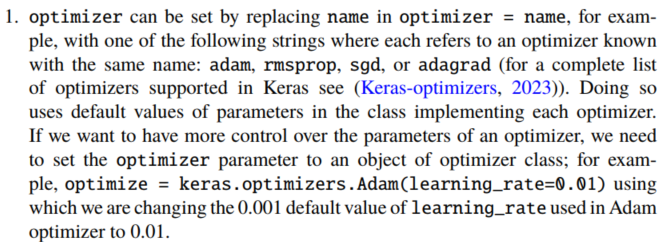

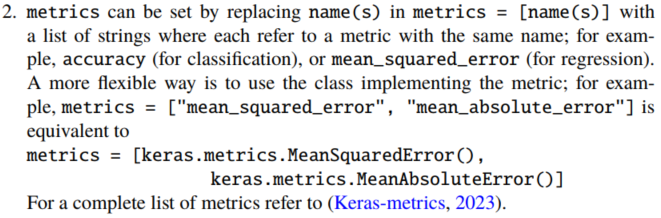

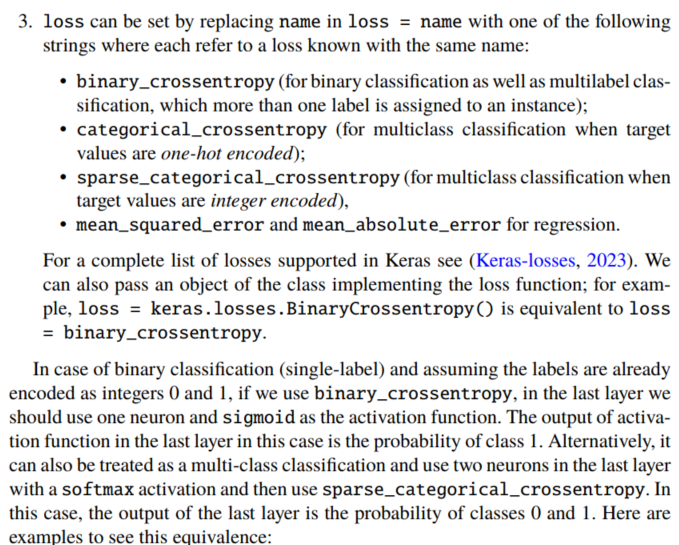

In [42]:
true_classes = [0, 1, 1]
class_probs_per_obs = [[0.9, 0.1], [0.2, 0.8], [0.4, 0.6]] # the outputs of softmax for two neurons

# Convert lists to tensors
true_classes = tf.convert_to_tensor(true_classes, dtype=tf.float32)
class_probs_per_obs = tf.convert_to_tensor(class_probs_per_obs, dtype=tf.float32)

scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(true_classes, class_probs_per_obs).numpy()

0.27977657

In [43]:
true_classes = [0, 1, 1]
class_1_prob_per_obs = [0.1, 0.8, 0.6] # the outputs of sigmoid for one neuron

# Convert lists to tensors
true_classes = tf.convert_to_tensor(true_classes, dtype=tf.float32)
class_1_prob_per_obs = tf.convert_to_tensor(class_1_prob_per_obs, dtype=tf.float32)

bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce(true_classes, class_1_prob_per_obs).numpy()

0.27977654

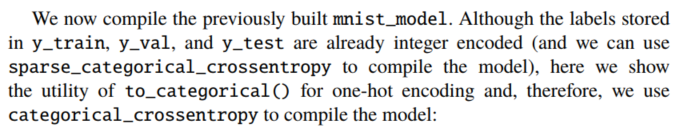

In [44]:
mnist_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [45]:
y_train_1_hot = keras.utils.to_categorical(y_train, num_classes = 10)
y_val_1_hot = keras.utils.to_categorical(y_val, num_classes = 10)
y_test_1_hot = keras.utils.to_categorical(y_test, num_classes = 10)
print(y_train.shape)
print(y_train_1_hot.shape)

(45000,)
(45000, 10)


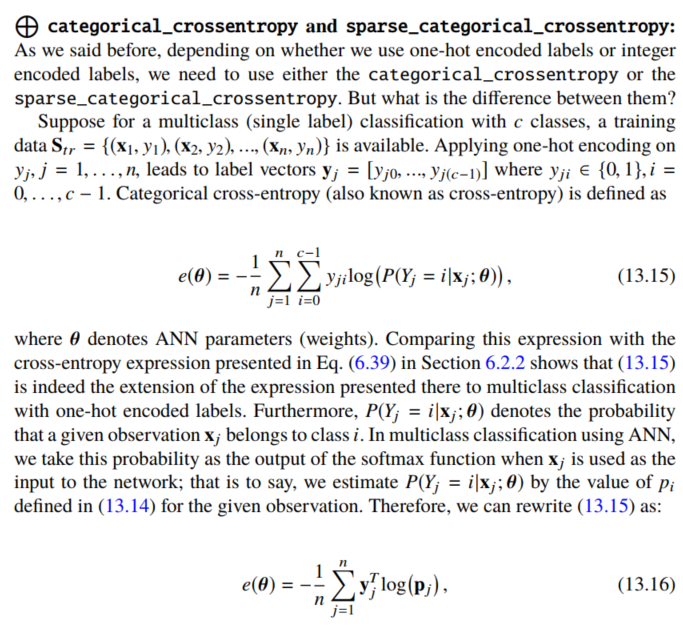

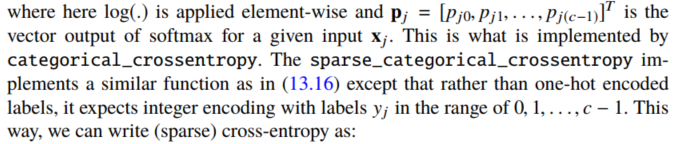

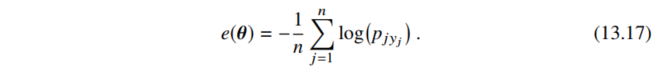

#### 13.5.4 Fitting

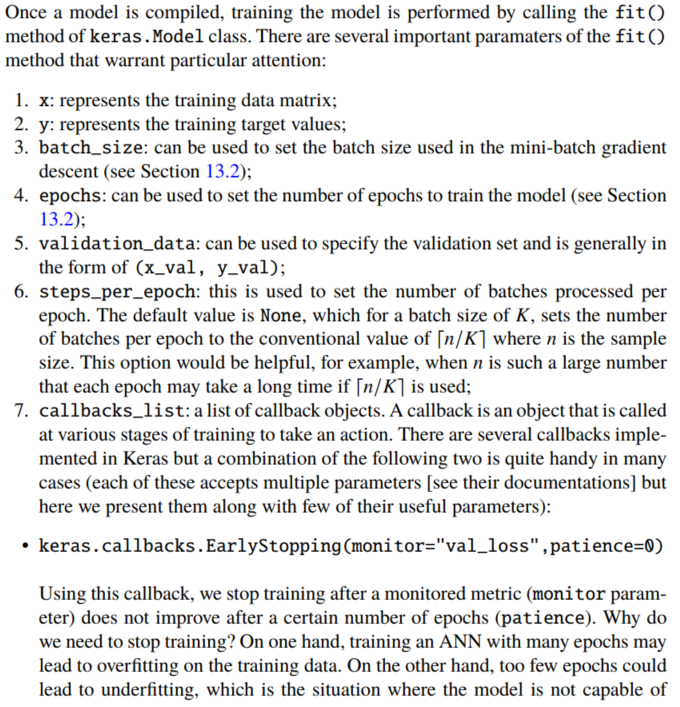

In [46]:
import time
my_callbacks = [
  keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=20),
  keras.callbacks.ModelCheckpoint(
    filepath="model/best_model.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=1)
]

start = time.time()
history = mnist_model.fit(x = X_train,
  y = y_train_1_hot,
  batch_size = 32,
  epochs = 200,
  validation_data = (X_val, y_val_1_hot),
  callbacks = my_callbacks)
end = time.time()
training_duration = end - start
print("training duration = {:.3f}".format(training_duration))

Epoch 1/200
1390/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7609 - loss: 0.9614
Epoch 1: val_loss improved from inf to 0.25346, saving model to model/best_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7623 - loss: 0.9559 - val_accuracy: 0.9235 - val_loss: 0.2535
Epoch 2/200
1400/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9306 - loss: 0.2340
Epoch 2: val_loss improved from 0.25346 to 0.17917, saving model to model/best_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9306 - loss: 0.2338 - val_accuracy: 0.9459 - val_loss: 0.1792
Epoch 3/200
1394/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9520 - loss: 0.1638
Epoch 3: val_loss improved from 0.17917 to 0.14185, saving model to model/best_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9520 - loss: 0.1636 - val_accuracy: 0.9574 - val_loss: 0.1419
Epoch 4/200
1404/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1230
Epoch 4: val_loss 

Text(0.5, 0, 'epoch')

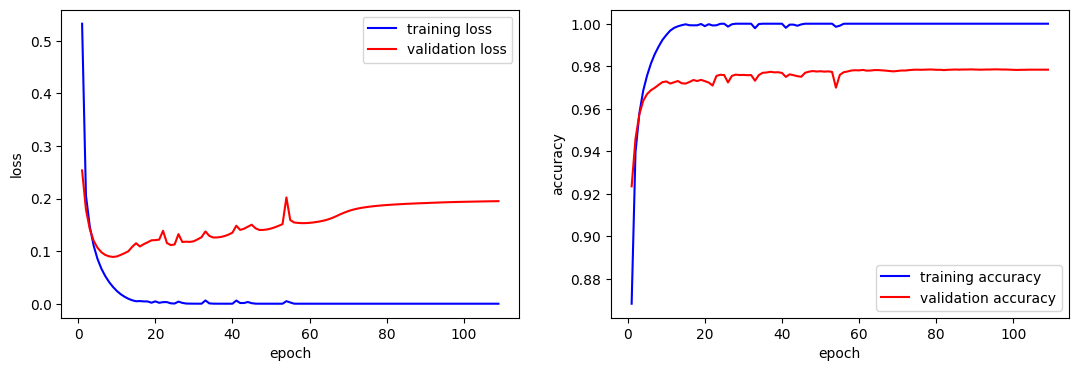

In [47]:
import matplotlib.pyplot as plt
epoch_count = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(epoch_count, history.history['loss'], 'b', label = 'training loss')
plt.plot(epoch_count, history.history['val_loss'], 'r', label = 'validation loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(epoch_count, history.history['accuracy'], 'b', label = 'training accuracy')
plt.plot(epoch_count, history.history['val_accuracy'], 'r', label = 'validation accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')

Put all codes in one place

In [ ]:
import time
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

seed_value= 42

# set the seed for Python built-in pseudo-random generator
import random

random.seed(seed_value)
# set the seed for numpy pseudo-random generator
import numpy as np
np.random.seed(seed_value)

# set the seed for tensorflow pseudo-random generator
import tensorflow as tf
tf.random.set_seed(seed_value)

# data preprocessing
(X_train_val, y_train_val), (X_test, y_test) = mnist.load_data()
X_train_val, X_test = X_train_val.astype('float32')/255, X_test.astype('float32')/255
X_train_val, X_test = X_train_val.reshape(60000, 28*28), X_test.reshape(10000, 28*28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=0.25)
y_train_1_hot = keras.utils.to_categorical(y_train, num_classes = 10)
y_val_1_hot = keras.utils.to_categorical(y_val, num_classes = 10)
y_test_1_hot = keras.utils.to_categorical(y_test, num_classes = 10)

# building model
mnist_model = keras.Sequential([
  layers.Dense(128, activation="sigmoid", input_shape = X_train[0].shape),
  layers.Dense(64, activation="sigmoid"),
  layers.Dense(10, activation="softmax")
])

# compiling model
mnist_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# training model
my_callbacks = [
  keras.callbacks.EarlyStopping(
  monitor="val_accuracy",
  patience=20),
  keras.callbacks.ModelCheckpoint(
  filepath="best_model.keras",
  monitor="val_loss",
  save_best_only=True,
  verbose=1)
]
start = time.time()
history = mnist_model.fit(x = X_train,
y = y_train_1_hot,
batch_size = 32,
epochs = 200,
validation_data = (X_val, y_val_1_hot),
callbacks=my_callbacks)
end = time.time()
training_duration = end - start
print("training duration = {:.3f}".format(training_duration))
print(history.history.keys())
print(mnist_model.summary())

# plotting the results
epoch_count = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(epoch_count, history.history['loss'], 'b', label = 'training loss')
plt.plot(epoch_count, history.history['val_loss'], 'r', label = 'validation loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(epoch_count, history.history['accuracy'], 'b', label = 'training accuracy')
plt.plot(epoch_count, history.history['val_accuracy'], 'r', label = 'validation accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')

#### 13.5.5 Evaluating and Predicting

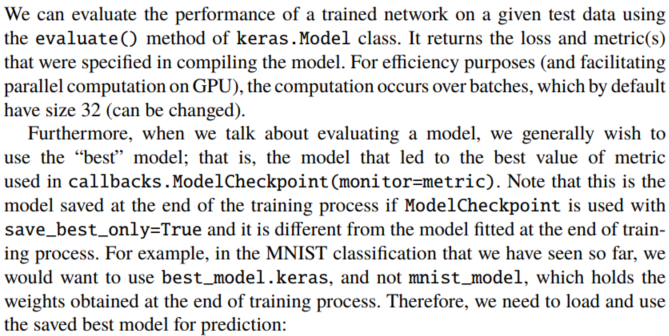

In [49]:
# load and evaluate the "best" model
best_mnist_model = keras.models.load_model("./model/best_model.keras")
loss, accuracy = best_mnist_model.evaluate(X_test, y_test_1_hot, verbose=1)
print('Test accuracy of the model with lowest loss on validation set (the best model) = {:.3f}'.format(accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9698 - loss: 0.0983
Test accuracy of the model with lowest loss on validation set (the best model) = 0.974


1. we can use `predict()` method of `keras.Model` class to obtain probabilitites of an observation belonging to a class. The computation is done over batches, which is useful for large-scale inference:

In [50]:
prob_y_test_pred = best_mnist_model.predict(X_test)
print("the size of predictions is (n_sample x n_classes):", prob_y_test_pred.shape)
print("class probabilitites for the first instance:\n", prob_y_test_pred[0])
print("the assigned class for the first instance is: ", prob_y_test_pred[0].argmax()) # the one with the highest probability
print("the actual class for the first instance is: ", y_test_1_hot[0].argmax())
y_test_pred = prob_y_test_pred.argmax(axis=1)
print("predicted classes for the first 10 isntances:", y_test_pred[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
the size of predictions is (n_sample x n_classes): (10000, 10)
class probabilitites for the first instance:
 [6.24023016e-07 2.65235285e-05 1.01974365e-04 5.52102341e-04
 2.46195469e-07 1.72035961e-05 1.17583465e-09 9.99276578e-01
 9.16472629e-07 2.37875156e-05]
the assigned class for the first instance is:  7
the actual class for the first instance is:  7
predicted classes for the first 10 isntances: [7 2 1 0 4 1 4 9 5 9]


2. for small number of test data, we can use `model(x)`:

In [51]:
prob_y_test_pred = best_mnist_model(X_test).numpy() # calling numpy() on a tensorflow tensor creates numpy arrays
print("the size of predictions is (n_sample x n_classes):", prob_y_test_pred.shape)
print("class probabilitites for the first instance:\n", prob_y_test_pred[0])
print("the assigned class is: ", prob_y_test_pred[0].argmax()) # the one with the highest probability
print("the actual class is: ", y_test_1_hot[0].argmax())
y_test_pred = prob_y_test_pred.argmax(axis=1)
print("predicted classes for the first 10 isntances:", y_test_pred[:10])

the size of predictions is (n_sample x n_classes): (10000, 10)
class probabilitites for the first instance:
 [6.24023642e-07 2.65235285e-05 1.01974365e-04 5.52102341e-04
 2.46195469e-07 1.72036125e-05 1.17583465e-09 9.99276578e-01
 9.16472629e-07 2.37875156e-05]
the assigned class is:  7
the actual class is:  7
predicted classes for the first 10 isntances: [7 2 1 0 4 1 4 9 5 9]


`sklearn.metrics`

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

print("Accuracy = {:.4f}".format(accuracy_score(y_test, y_test_pred)))
print("Confusion Matrix is\n {}".format(confusion_matrix(y_test, y_test_pred)))
print("Macro Average ROC AUC = {:.3f}".format(roc_auc_score(y_test, prob_y_test_pred, multi_class='ovr', average='macro')))

Accuracy = 0.9742
Confusion Matrix is
 [[ 966    0    2    1    1    4    2    2    1    1]
 [   0 1124    2    3    0    1    2    0    3    0]
 [   0    0 1017    4    1    1    3    3    3    0]
 [   0    0    7  987    0    8    0    3    5    0]
 [   2    0    3    1  948    2    5    4    2   15]
 [   2    1    1    4    0  878    3    0    2    1]
 [   6    3    2    0    5   11  929    0    2    0]
 [   1    4   14    9    1    0    0  994    1    4]
 [   5    1    3    8    4    5    4    1  942    1]
 [   2    4    1   14   10   10    1    5    5  957]]
Macro Average ROC AUC = 1.000


#### 13.5.6 CPU vs GPU Performance

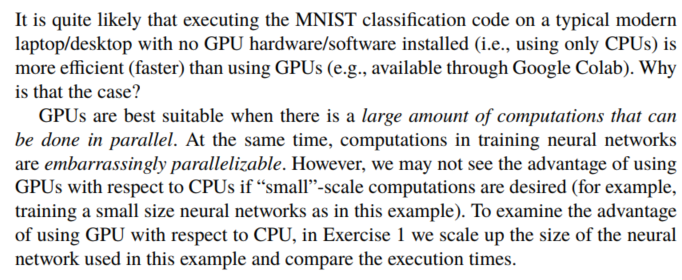

#### 13.5.7 Overfitting and Dropout

Overfitting

- A model is overfitted if the classifier/regressor has a perfect performance on training data but it exhibits a poor performance on unseen data.
-  Recall what we do in model selection when we try to tune a hyperparameter on a validation set (or using cross-validation if we desire to remove the bias to a specific validation set): we monitor the performance of the model on the validation set as a function of the hyperparameter and pick the value of the hyperparameter that leads to the best performance. 
- The reason we use a validation set is that the performance on that serves as a proxy for the performance of the model on test set. Therefore, we can use it to judge the possibility of overfitting as well.

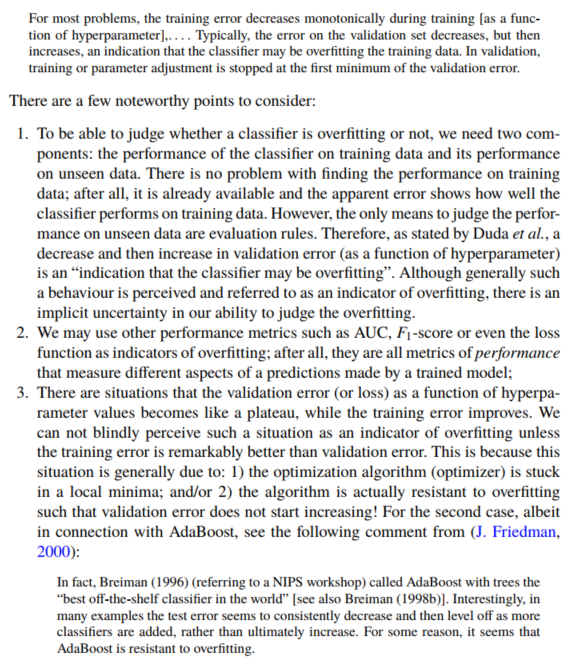

Dropout

- A popular approach to guard against overfitting
- The idea is to randomly omit each neuron in hidden layers or even each input feature with a pre-specified probability known as *dropout rate*
- Dropout rate (hyperparameter) is typically set between 0.2 to 0.5
- Typically the dropout rate for an input feature is lower (e.g., 0.2) than a neuron in a hidden layer (e.g., 0.5)
- To facilitate implementation, it is generally assumed the same dropout rate for all units (neuron or an input feature) in the same layer.
- In training where for each training instance in a mini-batch, a network is sampled by dropping out some units from the full architecture. Then the forward and backward computations that are part of the backprop algorithm are performed for that training instance in the mini-batch over the sampled network. The gradient for each weight that is used in optimizer to move the weight is averaged over the training instances in that mini-batch. In this regard, if for a training instance, its corresponding sampled network does not have a weight, the contribution of that training instance towards the gradient is set to 0. At the end of this process, we obtain estimates of weights for the full network (i.e., all units and their connections with no dropout).
- In testing stage, the full network is used (i.e., all connections with no dropout). However, the outgoing weights from a unit are multiplied by (1 − p) where p is the dropout rate for that unit. This approximation accounts for the fact that the unit was active in training with probability of (1 − p).

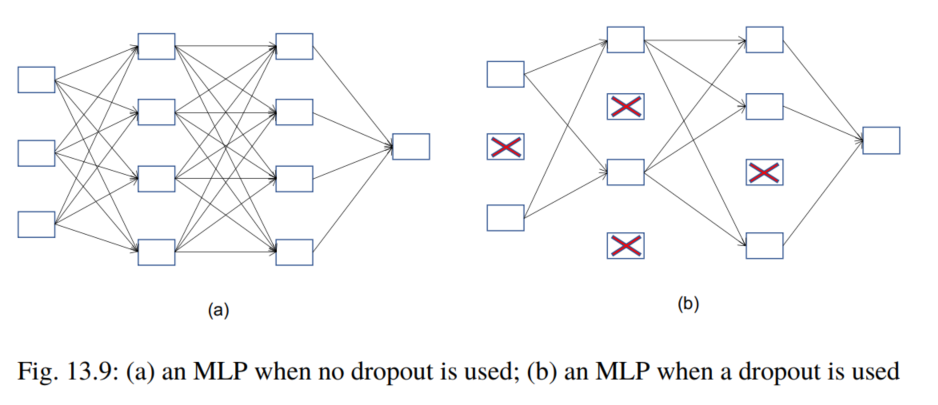

Epoch 1/200


c:\Users\User\anaconda3\envs\mle\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1392/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6270 - loss: 1.2150
Epoch 1: val_loss improved from inf to 0.29525, saving model to best_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6288 - loss: 1.2097 - val_accuracy: 0.9138 - val_loss: 0.2952
Epoch 2/200
1398/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8949 - loss: 0.3677
Epoch 2: val_loss improved from 0.29525 to 0.22276, saving model to best_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8950 - loss: 0.3675 - val_accuracy: 0.9318 - val_loss: 0.2228
Epoch 3/200
1396/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9199 - loss: 0.2869
Epoch 3: val_loss improved from 0.22276 to 0.18264, saving model to best_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9199 - loss: 0.2867 - val_accuracy: 0.9435 - val_loss: 0.1826
Epoch 4/200
1393/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9329 - loss: 0.2386
Epoch 4: val_loss improved from 0.18264 to 0.158

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

None


Text(0.5, 0, 'epoch')

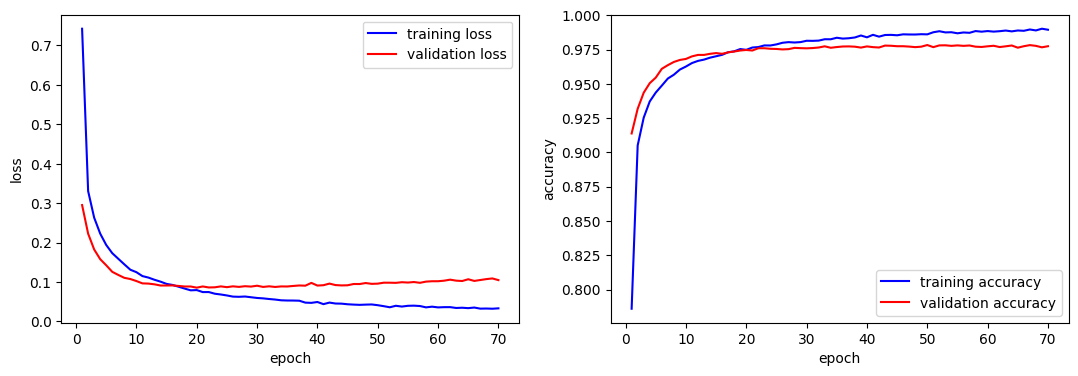

In [53]:
import time
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

seed_value= 42

# set the seed for Python built-in pseudo-random generator
import random
random.seed(seed_value)

# set the seed for numpy pseudo-random generator
import numpy as np
np.random.seed(seed_value)

# set the seed for tensorflow pseudo-random generator
import tensorflow as tf
tf.random.set_seed(seed_value)

# data preprocessing
(X_train_val, y_train_val), (X_test, y_test) = mnist.load_data()
X_train_val, X_test = X_train_val.astype('float32')/255, X_test.astype('float32')/255
X_train_val, X_test = X_train_val.reshape(60000, 28*28), X_test.reshape(10000, 28*28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=0.25)
y_train_1_hot = keras.utils.to_categorical(y_train, num_classes = 10)
y_val_1_hot = keras.utils.to_categorical(y_val, num_classes = 10)
y_test_1_hot = keras.utils.to_categorical(y_test, num_classes = 10)

# building model
mnist_model = keras.Sequential([
  layers.Dense(128, activation="sigmoid", input_shape = X_train[0].shape),
  layers.Dropout(0.3),
  layers.Dense(64, activation="sigmoid"),
  layers.Dropout(0.3),
  layers.Dense(10, activation="softmax")
])

# compiling model
mnist_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# training model
my_callbacks = [
  keras.callbacks.EarlyStopping(
  monitor="val_accuracy",
  patience=20),
  keras.callbacks.ModelCheckpoint(
  filepath="best_model.keras",
  monitor="val_loss",
  save_best_only=True,
  verbose=1)
]
start = time.time()
history = mnist_model.fit(x = X_train,
  y = y_train_1_hot,
  batch_size = 32,
  epochs = 200,
  validation_data = (X_val, y_val_1_hot),
  callbacks=my_callbacks)
end = time.time()
training_duration = end - start
print("training duration = {:.3f}".format(training_duration))
print(history.history.keys())
print(mnist_model.summary())

# plotting the results
epoch_count = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(epoch_count, history.history['loss'], 'b', label = 'training loss')
plt.plot(epoch_count, history.history['val_loss'], 'r', label = 'validation loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(epoch_count, history.history['accuracy'], 'b', label = 'training accuracy')
plt.plot(epoch_count, history.history['val_accuracy'], 'r', label = 'validation accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')

#### 13.5.8 Hyperparameter Tuning

To treat a Keras classifier/regressor as a scikit-learn estimator and use it along with scikit-learn classes, we can use:
- `keras.wrappers.scikit_learn.KerasClassifier`
- `keras.wrappers.scikit_learn.KerasRegressor`

In [62]:
def construct_model(hidden_layers = 1, neurons=32, dropout_rate=0.25, learning_rate = 0.001):
  # building model
  model = keras.Sequential()
  for i in range(hidden_layers):
    model.add(layers.Dense(units=neurons, activation="sigmoid"))
    model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(10, activation="softmax"))

  # compiling model
  model.compile(loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate),
    metrics=['acc'])
  
  return model

In [ ]:
import time
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

seed_value= 42

# set the seed for Python built-in pseudo-random generator
import random
random.seed(seed_value)

# set the seed for numpy pseudo-random generator
import numpy as np
np.random.seed(seed_value)

# set the seed for tensorflow pseudo-random generator
import tensorflow as tf
tf.random.set_seed(seed_value)

# data preprocessing
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.astype('float32')/255, X_test.astype('float32')/255
X_train, X_test = X_train.reshape(60000, 28*28), X_test.reshape(10000, 28*28)
strkfold = StratifiedKFold(n_splits=3, shuffle=True)
keras_est = KerasClassifier(build_fn=construct_model, verbose=1)
param_grid = {'hidden_layers': [1, 2], 'neurons': [32, 64], 'dropout_rate': [0.2, 0.4], 'epochs': range(10,90,20)}
gscv = GridSearchCV(keras_est, param_grid, cv=strkfold)

# training model
score_best_estimator=gscv.fit(X_train, y_train).score(X_test, y_test)

#best model based on grid search cv
print('the highest CV score is: {:.3f}'.format(gscv.best_score_))
print('the best combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))